                 Restaurants Project
              SIMPLILEARN CAPSTONE PROJECT
                (MARKETING DOMAIN)
           IDENTIFYING AND RECOMMENDING BEST RESTAURANTS

In [19]:
#Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
data =pd.read_excel("C:/Users/sharm/OneDrive/Desktop/Capstone project/1582800386_project1datadictionary/data.xlsx")

In [24]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [25]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [26]:
cc= pd.read_excel("C:/Users/sharm/OneDrive/Desktop/Capstone project/1582800386_project1datadictionary/Country-Code.xlsx")
cc

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [27]:
data1= pd.merge(data,cc,on='Country Code', how= 'left')
data1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [28]:
data1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [29]:
data1.columns= data1.columns.str.replace(' ','_')
data1.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Price_range           9551 non-null   int64  
 15  Aggregate_rating     

In [11]:
data1.shape

(9551, 20)

In [12]:
data1.dtypes

Restaurant_ID             int64
Restaurant_Name          object
Country_Code              int64
City                     object
Address                  object
Locality                 object
Locality_Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average_Cost_for_two      int64
Currency                 object
Has_Table_booking        object
Has_Online_delivery      object
Price_range               int64
Aggregate_rating        float64
Rating_color             object
Rating_text              object
Votes                     int64
Country                  object
dtype: object

<AxesSubplot:>

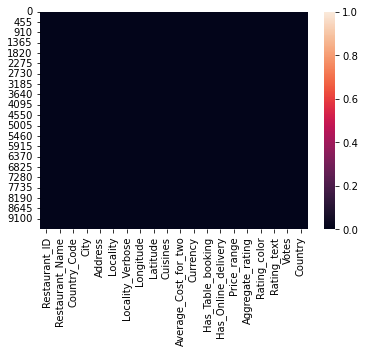

In [31]:
import seaborn as sns  ###Removing and checking null values
sns.heatmap(data1.isnull())

In [14]:
data.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
#if resturant name is missing drop the name and reset the index
data1.dropna(axis=0, subset =['Restaurant_Name'],inplace= True)
data1.reset_index(drop= True,inplace= True)

In [33]:
data1[data1['Cuisines'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9082,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9085,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9093,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9405,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9493,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9503,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9532,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9534,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9538,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [34]:
## there is only 9 null values in cuisines so replace them with {others}
data1['Cuisines'].fillna('Others',inplace=True)

In [35]:
data1.isnull().sum()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9550 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9550 non-null   int64  
 3   City                  9550 non-null   object 
 4   Address               9550 non-null   object 
 5   Locality              9550 non-null   object 
 6   Locality_Verbose      9550 non-null   object 
 7   Longitude             9550 non-null   float64
 8   Latitude              9550 non-null   float64
 9   Cuisines              9550 non-null   object 
 10  Average_Cost_for_two  9550 non-null   int64  
 11  Currency              9550 non-null   object 
 12  Has_Table_booking     9550 non-null   object 
 13  Has_Online_delivery   9550 non-null   object 
 14  Price_range           9550 non-null   int64  
 15  Aggregate_rating     

In [ ]:
#exploring the geographical location of the restaurant
#idetifying the cities with maximum and minimun no. of restaurant
#using group by we can carry on

In [36]:
country_dist=data1.groupby(['Country_Code', 'Country']).agg(Count=('Restaurant_ID','count'))

In [37]:
country_dist.sort_values(by ='Count', ascending =False)

,,Count
Country_Code,Country,
1,India,8651
216,United States,434
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


In [16]:
country_dist.plot(kind= 'barh')

NameError: name 'country_dist' is not defined

In [39]:
#cities with maximum and minimum no. of resturant
city_dist=data1.groupby(['Country','City']).agg(Count= ('Restaurant_ID', 'count'))

In [40]:
city_dist.describe()

,Count
count,141.000000
mean,67.730496
std,476.723952
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000


In [17]:
###the above analysis shows no. of resturants in cities  that  is mimimum  1 and maximum is 5473

In [41]:
### sorting cities with most number of restaurants
city_dist.sort_values(by='Count', ascending= False)

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

In [ ]:
##analysis shows that New Delhi has maximum number of restaurants

In [45]:
#Number of countries with minimum restaurants
min_rest=city_dist[city_dist['Count']==1]
min_rest.info()
min_rest


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46 entries, ('Australia', 'Armidale') to ('United States', 'Winchester Bay')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   46 non-null     int64
dtypes: int64(1)
memory usage: 1.8+ KB


Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [46]:
# ratings distributed overall and highest and lowest rated restaurants
## highest rating
max_rate=data1.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index = False).first()
max_rate

,Country,City,Restaurant_ID,Restaurant_Name,Country_Code,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,Australia,Armidale,16611114,Whitebull Hotel,14,"117 Marsh St, Armidale, NSW",Armidale,"Armidale, Armidale",151.668879,-30.514717,"Bar Food, Steak",20,Dollar($),No,No,2,3.5,Yellow,Good,25
1,Australia,Balingup,16608864,Taste of Balingup,14,"63 South Western Hwy, Balingup, WA",Balingup,"Balingup, Balingup",115.984492,-33.784527,Modern Australian,20,Dollar($),No,No,2,3.2,Orange,Average,21
2,Australia,Beechworth,16604911,Bridge Road Brewers,14,"Old Coach House 50 Ford St, Beechworth, Beechw...",Beechworth,"Beechworth, Beechworth",146.685852,-36.360439,"Pizza, Bar Food",20,Dollar($),No,No,2,4.6,Dark Green,Excellent,237
3,Australia,Dicky Beach,16615894,The Giggling Goat,14,"14 Beerburrum St, Dicky Beach, QLD",Dicky Beach,"Dicky Beach, Dicky Beach",153.137401,-26.783576,"Coffee and Tea, Tea, Modern Australian",7,Dollar($),No,No,1,3.6,Yellow,Good,29
4,Australia,East Ballina,16612028,The Belle General,14,"12 Shelly Beach Rd, East Ballina, NSW",East Ballina,"East Ballina, East Ballina",153.593331,-28.862663,Cafe,20,Dollar($),No,No,2,4.1,Green,Very Good,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,United States,Valdosta,17678218,Smok'n Pig B-B-Q,216,"4228 N Valdosta Rd, Valdosta, GA 31602",Valdosta,"Valdosta, Valdosta",-83.332796,30.897087,BBQ,25,Dollar($),No,No,2,4.1,Green,Very Good,575
137,United States,Vernonia,17558738,Blue House Cafe,216,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Vernonia, Vernonia",-123.195437,45.858667,"Coffee and Tea, Mediterranean",10,Dollar($),No,No,1,4.3,Green,Very Good,88
138,United States,Waterloo,17696891,Four Queens Dairy Cream,216,"1310 W 1st St, Cedar Falls, IA 50613",Cedar Falls,"Cedar Falls, Waterloo",-92.459900,42.537700,Desserts,10,Dollar($),No,No,1,3.9,Yellow,Good,190
139,United States,Weirton,17694056,Theo Yianni's Authentic Greek Restaurant,216,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,2,3.9,Yellow,Good,156


In [43]:
# mimimum rating restaurants
min_rate=data1.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index = False).last()
min_rate

,Country,City,Restaurant_ID,Restaurant_Name,Country_Code,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,Australia,Armidale,16611114,Whitebull Hotel,14,"117 Marsh St, Armidale, NSW",Armidale,"Armidale, Armidale",151.668879,-30.514717,"Bar Food, Steak",20,Dollar($),No,No,2,3.5,Yellow,Good,25
1,Australia,Balingup,16608864,Taste of Balingup,14,"63 South Western Hwy, Balingup, WA",Balingup,"Balingup, Balingup",115.984492,-33.784527,Modern Australian,20,Dollar($),No,No,2,3.2,Orange,Average,21
2,Australia,Beechworth,16604911,Bridge Road Brewers,14,"Old Coach House 50 Ford St, Beechworth, Beechw...",Beechworth,"Beechworth, Beechworth",146.685852,-36.360439,"Pizza, Bar Food",20,Dollar($),No,No,2,4.6,Dark Green,Excellent,237
3,Australia,Dicky Beach,16615894,The Giggling Goat,14,"14 Beerburrum St, Dicky Beach, QLD",Dicky Beach,"Dicky Beach, Dicky Beach",153.137401,-26.783576,"Coffee and Tea, Tea, Modern Australian",7,Dollar($),No,No,1,3.6,Yellow,Good,29
4,Australia,East Ballina,16612028,The Belle General,14,"12 Shelly Beach Rd, East Ballina, NSW",East Ballina,"East Ballina, East Ballina",153.593331,-28.862663,Cafe,20,Dollar($),No,No,2,4.1,Green,Very Good,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,United States,Valdosta,17678043,El Toreo Mexican Restaurant,216,"1713 Gornto Rd, Valdosta, GA 31601",Valdosta,"Valdosta, Valdosta",-83.324700,30.842600,Mexican,25,Dollar($),No,No,2,3.1,Orange,Average,83
137,United States,Vernonia,17558738,Blue House Cafe,216,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Vernonia, Vernonia",-123.195437,45.858667,"Coffee and Tea, Mediterranean",10,Dollar($),No,No,1,4.3,Green,Very Good,88
138,United States,Waterloo,17697444,Masala Grill & Coffee House,216,"911 W 23rd St, Cedar Falls, IA 50613",Cedar Falls,"Cedar Falls, Waterloo",-92.456343,42.516908,"Indian, Middle Eastern",10,Dollar($),No,No,1,3.2,Orange,Average,18
139,United States,Weirton,17694056,Theo Yianni's Authentic Greek Restaurant,216,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,2,3.9,Yellow,Good,156


In [47]:
### data frame for high rated restaurants
df_max= max_rate[['Country','City','Restaurant_Name','Aggregate_rating']]
df_max

,Country,City,Restaurant_Name,Aggregate_rating
0,Australia,Armidale,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1
...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1
137,United States,Vernonia,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9


In [49]:
### data frame for low rated restaurants
df_min= min_rate[['Country','City','Restaurant_Name','Aggregate_rating']]
# merging both data frame
rest_rating=df_max.merge(df_min,left_on='City',right_on='City',how='inner')

In [50]:
rest_rating

,Country_x,City,Restaurant_Name_x,Aggregate_rating_x,Country_y,Restaurant_Name_y,Aggregate_rating_y
0,Australia,Armidale,Whitebull Hotel,3.5,Australia,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Australia,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Australia,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,Australia,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,Australia,The Belle General,4.1
...,...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,United States,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,United States,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,United States,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,United States,Theo Yianni's Authentic Greek Restaurant,3.9


In [51]:
rest_rating.drop(columns='Country_y',axis=1,inplace=True)
rest_rating.columns=['Country', 'City',' Highest Rated Restaurants', 'Rating Max', 'Lowest Rated Restaurant', 'Rating Min']
rest_rating

,Country,City,Highest Rated Restaurants,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


In [52]:
data_rest=data1.copy()
data_rest.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [53]:
# Ratio of restaurants that allow table booking vs. those that do not
#the percentage of restaurants providing online delivery
#Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

dummy= ['Has_Table_booking','Has_Online_delivery']


In [54]:
data_rest=pd.get_dummies(data_rest,columns= dummy,drop_first= True)
data_rest.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [55]:
#Ratio between restaurants that allow table booking vs that do not allow table booking
table_book=data_rest[data_rest['Has_Table_booking_Yes']==1]['Restaurant_ID'].count()
notable_book=data_rest[data_rest['Has_Table_booking_Yes']==0]['Restaurant_ID'].count()
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',round((table_book/notable_book),2))


Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


In [56]:
print(table_book,notable_book)

1158 8392


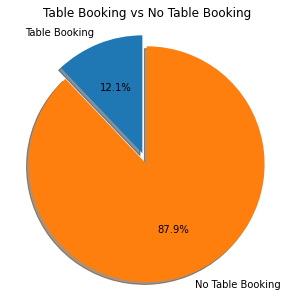

In [57]:
#Pie chart to show percentage of restaurants which allow table booking and those which don't
labels = 'Table Booking', 'No Table Booking'
sizes =[table_book,notable_book]
explode = (0.1, 0) # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True ,startangle=90)
ax1.set_title("Table Booking vs No Table Booking")
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [58]:
#Percentage of restaurant that has online delivery
ol_dlvry = data_rest[data_rest['Has_Online_delivery_Yes'] ==1]['Restaurant_ID'].count()
no_ol_dlvry = data_rest[data_rest['Has_Online_delivery_Yes'] ==0]['Restaurant_ID'].count()
print('Percentage of restaurants providing online delivery : {} %'.format((round(ol_dlvry/len(data_rest),3)*100)))

Percentage of restaurants providing online delivery : 25.7 %


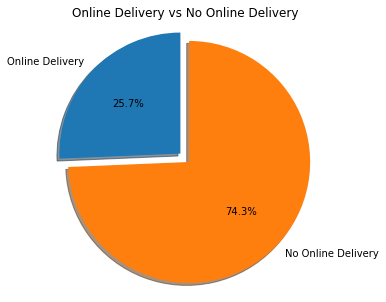

In [59]:
#pie chart to show percentages of restaurants allowing online delivery vs those which do not have online delivery
labels = 'Online Delivery','No Online Delivery'
size = [ol_dlvry,no_ol_dlvry]
explode = (0.1,0)
fig1,ax1 = plt.subplots(figsize=(5,5))
ax1.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.set_title("Online Delivery vs No Online Delivery")
ax1.axis('equal')
plt.show()

In [60]:
#Difference in no. of votes for the restaurants that deliver and the restaurant that don’t?
rest_del = data_rest[data_rest['Has_Table_booking_Yes'] == 1]['Votes'].sum()
rest_ndel = data_rest[data_rest['Has_Table_booking_Yes'] == 0]['Votes'].sum()
print('Difference in number of votes for restaurants that deliver and dont deliver: ',abs((rest_del - rest_ndel)))
 

Difference in number of votes for restaurants that deliver and dont deliver:  680082


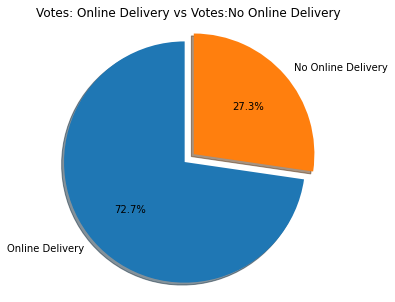

In [127]:
labels = 'Online Delivery','No Online Delivery'
size = [rest_ndel,rest_del]
explode = (0,0.1)
fig1,ax1 = plt.subplots(figsize=(5,5))
ax1.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.set_title("Votes: Online Delivery vs Votes:No Online Delivery")
ax1.axis('equal')
plt.show()

In [ ]:
#What are the top 10 cuisines served across cities?
#What is the maximum and minimum no. of cuisines that a restaurant serves?


In [61]:
data1.columns


Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [62]:
cuisines = data1['Cuisines'].apply(lambda x: pd.Series(x.split(',')))

In [63]:
cuisines.columns= ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.tail()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
9545,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9546,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9547,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9548,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9549,Chinese,North Indian,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data_cuisines = pd.concat([data1,cuisines],axis=1)
data_cuisines.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,1498,Indonesia,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,873,Indonesia,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,605,Indonesia,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,395,Indonesia,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
cuisine_loc = pd.DataFrame(data_cuisines[['Country','City','Locality_Verbose','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

In [148]:
cuisine_loc_stack=pd.DataFrame(cuisine_loc.stack()) #stacking the columns
cuisine_loc.head()

,Country,City,Locality__Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Indonesia,Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,Jakarta,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Jakarta,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,Jakarta,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
keys = [c for c in cuisine_loc if c.startswith('Cuisine')]
a=pd.melt(cuisine_loc, id_vars='Locality_Verbose', value_vars=keys,value_name='Cuisines')
#melting the stack into one row
max_rate=pd.DataFrame(a.groupby(by=['Locality_Verbose','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate
del max_rate['variable']
max_rate.columns=['Locality_Verbose','Cuisines','Count']
max_rate.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [70]:
#find the highest restuarant in the city
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality_Verbose'],as_index=False).first()
loc.head()


,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


In [72]:
rating_res=loc.merge(data1,left_on='Locality_Verbose',right_on='Locality_Verbose',how='inner')
#inner join to merge the two dataframe
df=pd.DataFrame(rating_res[['Country','City','Locality_Verbose','Cuisines_x','Count']])
#making a dataframe of rating restaurant
country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()
#grouping the data by country code
con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']
#renaming the columns
con1=con.sort_values('Number of restaurants in the country', ascending=False)
#sorting the restaurants on the basis of the number of restaurants in the country
con1[:10]
final_con=con1.drop(con1.index[[7,10]])


In [73]:
final_con

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,48
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Japanese,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Cape Town,Green Point,Grill,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2
0,Australia,Victor Harbor,Victor Harbor,Coffee and Tea,1


In [74]:
loc_list=final_con['City'] #converting the series to dataframe
a_list=loc_list.tolist()
cui_list=final_con['Cuisines']# converting the series to dataframe
b_list=cui_list.tolist()
count_list=final_con['Number of restaurants in the country']# converting the series to dataframe
c_list=count_list.tolist()

In [75]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()
import plotly.graph_objs as go #importing plotly or graphs
trace0 = go.Bar(# BarChart 1 (Popular cuisines of the country) 
    x=b_list,   #x axis label
    y=c_list, # y axis label
text=loc_list, # location of the cuisine
name='Popular Cuisine',
marker=dict( color=['rgb(255,69,0)',
'rgb(255,140,0)',
'rgb(165,42,42)',
'rgb(220,20,60)',
'rgb(255,0,0)',
'rgb(255,99,71)',
'rgb(255,127,80)',
'rgb(205,92,92)',
'rgb(240,128,128)',
'rgb(233,150,122)',
'rgb(250,128,114)',
'rgb(255,160,122)'],
line=dict(
color='rgb(255,0,0)',#color of the bar graph's line
width=1.5, #width of the bar graph
    )
), opacity=1.0
)
data = [trace0]
layout = go.Layout(
legend=dict( #the layout of the graph( beautification)
x=0,
y=1,
traceorder='normal',
font=dict(
family='sans-serif',
size=12,
color='#000'
), bgcolor='#E2E2E2',
bordercolor='#FFFFFF',
borderwidth=20,
),
autosize=False,
width=1000, # size of the graph
height=450,
margin=Margin(r=20, l=300,
b=75, t=125),
title="Graph 2.1 : Most popular cuisines in the World<br>\
<i>hover with cursor to see location in the country where they are most popular </i>", 
    #title of the graph plot_bgcolor='rgba(245, 246, 249, 1)',
xaxis=dict(tickangle=-45,title='<br>Cuisine<br>',mirror=True,showticklabels=True),
    #making the graphs label inclined at 45 deg
yaxis= {'title': 'Number of restaurants offering<br> cuisine in the location'},#label of y-axis
)
fig = go.Figure(data=data, layout=layout)#plotting the graph
iplot(fig)


ModuleNotFoundError: No module named 'plotly'

In [76]:
rest_cuisine = pd.DataFrame(data_cuisines[['Restaurant_Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
rest_cuisine_stack=pd.DataFrame(rest_cuisine.stack()) #stacking the columns
rest_cuisine.head()

,Restaurant_Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
keys1 = [c for c in rest_cuisine if c.startswith('Cuisine')]
b=pd.melt(rest_cuisine, id_vars='Restaurant_Name', value_vars=keys,value_name='Cuisines')
#melting the stack into one row
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant_Name','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant_Name','Cuisines','Count']
max_rate1.head(20)


,Restaurant_Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [93]:
max_rate1.sort_values('Count',ascending=False)
#Cafe Coffee Day has the max number of cuisines and The least number of cuisines in a resaurant is 1.

,Restaurant_Name,Cuisines,Count
2479,Cafe Coffee Day,Cafe,83
4596,Domino's Pizza,Pizza,79
4597,Domino's Pizza,Fast Food,78
12984,Subway,Salad,63
12985,Subway,Healthy Food,63
...,...,...,...
5568,Gabbar's Bar & Kitchen,Chinese,1
5569,Gabbar's Bar & Kitchen,Mexican,1
5570,Gabbar's Bar & Kitchen,Italian,1
5571,Gaga Manjero,World Cuisine,1


In [90]:
rating =data_rest[['Restaurant_ID','Restaurant_Name','Country','City','Aggregate_rating','Average_Cost_for_two','Votes','Price_range']]
rating

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3
2,7420899,Sushi Masa,Indonesia,Jakarta,4.9,500000,605,3
3,7421967,3 Wise Monkeys,Indonesia,Jakarta,4.2,450000,395,3
4,7422489,Avec Moi Restaurant and Bar,Indonesia,Jakarta,4.3,350000,243,3
...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,India,Dehradun,4.3,0,63,1
9546,2300497,Atmosphere Grill Cafe Sheesha,India,Kanpur,3.6,0,34,1
9547,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1
9548,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1


In [94]:
rating =rating.merge(max_rate1,left_on='Restaurant_Name',right_on='Restaurant_Name',how='left')
rating

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,Italian,1
1,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,Continental,1
2,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,Asian,1
3,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,Western,1
...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,Italian,1
23811,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,Beverages,1
23812,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,Street Food,1
23813,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,Chinese,1


,Count,Aggregate_rating
Count,1.000000,-0.001642
Aggregate_rating,-0.001642,1.000000


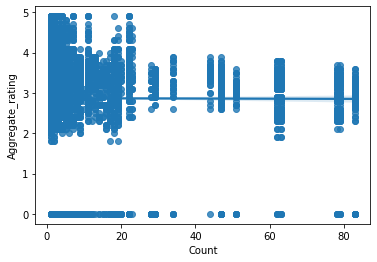

In [95]:
sns.regplot(x='Count',y='Aggregate_rating',data=rating)
rating[["Count", "Aggregate_rating"]].corr()
#Number of cuisines is not a good factor to decide the rating of a restaurant

,Average_Cost_for_two,Aggregate_rating
Average_Cost_for_two,1.00000,0.05011
Aggregate_rating,0.05011,1.00000


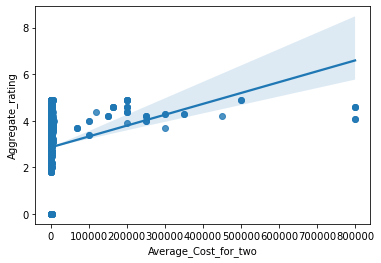

In [96]:
sns.regplot(x='Average_Cost_for_two',y='Aggregate_rating',data=rating)
rating[["Average_Cost_for_two", "Aggregate_rating"]].corr()
#Average cost for two is a weak positive factor to decide the rating of a restaurant


,Votes,Aggregate_rating
Votes,1.000000,0.318667
Aggregate_rating,0.318667,1.000000


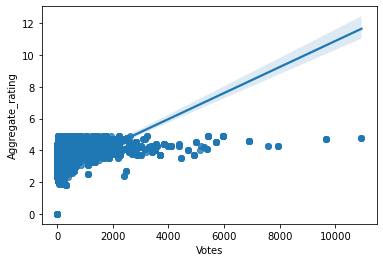

In [97]:
 sns.regplot(x='Votes',y='Aggregate_rating',data=rating)
rating[['Votes','Aggregate_rating']].corr()
##Average cost for two can be a factor to decide the rating of a restaurant

,Price_range,Aggregate_rating
Price_range,1.000000,0.462983
Aggregate_rating,0.462983,1.000000


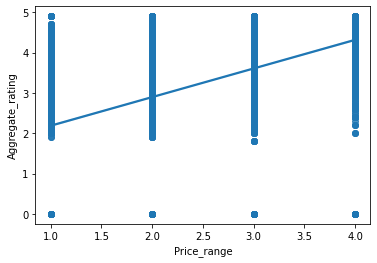

In [98]:
abc = data_rest[data_rest['Has_Online_delivery_Yes'] == 1]['Aggregate_rating'].mean()
xyz = data_rest[data_rest['Has_Online_delivery_Yes'] == 0]['Aggregate_rating'].mean()
sns.regplot(x='Price_range',y='Aggregate_rating',data=rating)
rating[['Price_range','Aggregate_rating']].corr()
##Price range can be a factor to decide the rating of a restaurant

In [103]:
sns.regplot(x='Has_Table_booking_Yes',y='Aggregate_rating',data=rating)
rating[['Has_Table_booking_Yes','Aggregate_rating']].corr()
##Table booking can be a factor to decide the rating of a restaurant


KeyError: 'Has_Table_booking_Yes'

In [104]:
#We see that there is no single variable that affects the rating strongly, however table booking,online
#delivery,avg price for two and price range, number of votes do play a part in affecting the rating of a restaurant.

In [105]:
data_rest.to_excel("Restaurant_Zomato_Data.xls",index=False)

C:\Users\sharm\AppData\Local\Temp/ipykernel_18088/3851204521.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data_rest.to_excel("Restaurant_Zomato_Data.xls",index=False)


In [106]:
new=pd.read_excel("Restaurant_Zomato_Data.xls")

In [107]:
new

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),1,4.3,Green,Very Good,63,India,0,0
9546,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),1,3.6,Yellow,Good,34,India,0,0
9547,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),1,3.9,Yellow,Good,127,India,0,0
9548,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),1,3.8,Yellow,Good,78,India,0,0
